# Zadanie 11 Pracownia Specjalistyczna - Eksploracja danych
### Krzysztof Funkowski

In [1]:
from math import *
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

# Zadanie 11
- Mapy samoorganizujące się Kohonena (SOM).
- Wizualizacja mapy na przykładzie zbioru danych Iris.

### Wgranie zbioru Iris

In [2]:
df = pd.read_csv('Iris.csv', sep=',', index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [3]:
#dataset = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].to_numpy()
dataset = df[['SepalLengthCm','SepalWidthCm']].to_numpy()

### Gatunki

In [28]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [77]:
setosa = df[df['Species'].str.contains('Iris-setosa')]
versicolor = df[df['Species'].str.contains('Iris-versicolor')]
virginica = df[df['Species'].str.contains('Iris-virginica')]

### Wizualizacja zbioru

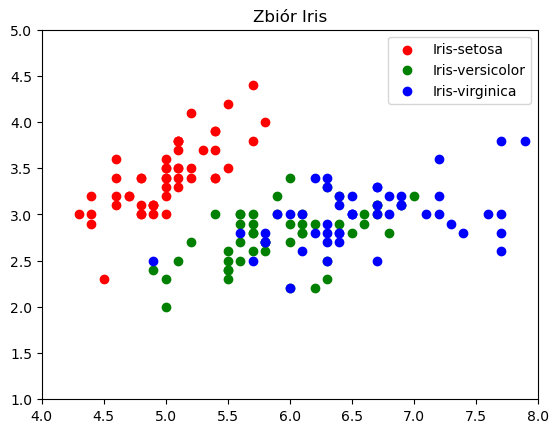

In [30]:
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], color='red', marker='o', label='Iris-setosa')
plt.scatter(versicolor['SepalLengthCm'], versicolor['SepalWidthCm'], color='green', marker='o', label='Iris-versicolor')
plt.scatter(virginica['SepalLengthCm'], virginica['SepalWidthCm'], color='blue', marker='o', label='Iris-virginica')
plt.xlim(4,8)
plt.ylim(1,5)
plt.legend()
plt.title('Zbiór Iris')
plt.show()

### Uruchomienie algorytmu SOM

In [96]:
max_iterations = 100
learning_rate = 0.01
initial_radius = 0.1
input_size = dataset.shape[1]  # Liczba cech
output_size = 10 * 10

In [49]:
# Inicjalizacja wag
weights = np.random.rand(output_size, input_size)
weights[:,0] = np.min(dataset[:,0]) + weights[:,0] * (np.max(dataset[:,0]) - np.min(dataset[:,0]))
weights[:,1] = np.min(dataset[:,1]) + weights[:,1] * (np.max(dataset[:,1]) - np.min(dataset[:,1]))
weights

array([[6.49387342, 3.34029992],
       [4.63000615, 4.32979722],
       [5.33809008, 2.87083486],
       [4.88045196, 2.45393474],
       [7.2888197 , 2.95687938],
       [6.10530675, 3.9094711 ],
       [6.56929952, 4.07574248],
       [7.45411042, 3.61298988],
       [4.70118405, 4.07714279],
       [5.38563092, 3.44629602],
       [5.77125763, 3.66938732],
       [4.76096334, 4.2075138 ],
       [6.92998765, 3.86740792],
       [6.0174831 , 2.27989327],
       [4.93299883, 2.10735155],
       [7.61020547, 3.11913824],
       [7.53420675, 2.39267607],
       [5.70410224, 2.18795827],
       [5.36369235, 4.28595874],
       [7.68171925, 3.19730118],
       [5.01886362, 3.28565112],
       [5.51076178, 3.68892653],
       [7.59577282, 3.39447707],
       [6.07607073, 2.72400125],
       [5.85288635, 2.45723575],
       [6.11579243, 3.0242709 ],
       [7.67953432, 4.17202487],
       [7.38828438, 2.9063704 ],
       [6.84660776, 3.17858559],
       [7.733193  , 3.50476699],
       [4.

In [112]:
# Funkcja do znajdowania najbliższego neuronu
def find_best_matching_unit(current_point, weights):
    distances = np.linalg.norm(weights - current_point, axis=1) # Wyznaczanie dystansów euklidesem
    return np.argmin(distances) # Wybór indeksu neuronu

# Aktualizacja zwycięzcy
def update_winner(current_point, winner, weights, learning_rate):    
    weights[winner] += learning_rate * (current_point - weights[winner])

# Obliczenie Gaussa
def calculate_gaussian(radius, sigma):
    return np.exp(-(radius**2) / (2 * sigma**2))

# Aktualizacja sąsiadów
def update_neighborhood(winner, weights, learning_rate, initial_radius, iteration, max_iterations):
    num_neurons = len(weights) # Liczba neuronów
    current_radius = initial_radius * np.exp(-iteration / (max_iterations / np.log(initial_radius))) # Zmniejszanie co iterację promienia sąsiadów

    # Przechodzenie po wszystkich neuronach
    for i in range(num_neurons):
        # Jeżeli neuron to nie zwycięzca
        if i != winner:
            distance = np.linalg.norm(weights[i] - weights[winner]) # wyznaczanie dystansu neuronu od zwycięzcy
            neighborhood_influence = calculate_gaussian(distance, current_radius) # obliczanie Gaussem wartości wpływu
            weights[i] = weights[i] + learning_rate * neighborhood_influence * (weights[winner] - weights[i]) # aktualizacja neuronu (sąsiada)

def one_iteration(dataset, weights, learning_rate, initial_radius, current_iteration, max_iterations):
    # Losowy wybór punktu z danych
    current_point = dataset[np.random.randint(0, dataset.shape[0])]

    # Znalezienie najbliższego do niego neuronu
    winner = find_best_matching_unit(current_point, weights)

    # Aktualizacja zwycięzcy
    update_winner(current_point, winner, weights, learning_rate)
    # Aktualizacja sąsiadów
    update_neighborhood(winner, weights, learning_rate, initial_radius, current_iteration, max_iterations)

def smo(dataset, weights, learning_rate, initial_radius, max_iterations):
    
    for current_iteration in range(max_iterations):
        one_iteration(dataset, weights, learning_rate, initial_radius, current_iteration, max_iterations)

In [110]:
weights = np.random.rand(output_size, input_size)
weights[:,0] = np.min(dataset[:,0]) + weights[:,0] * (np.max(dataset[:,0]) - np.min(dataset[:,0]))
weights[:,1] = np.min(dataset[:,1]) + weights[:,1] * (np.max(dataset[:,1]) - np.min(dataset[:,1]))
smo(dataset, weights, learning_rate, initial_radius, 5000)

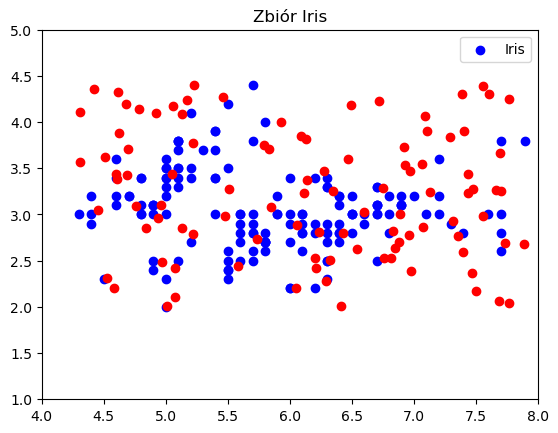

In [111]:
plt.scatter(dataset[:,0], dataset[:,1], color='blue', marker='o', label='Iris')
for i in range(output_size):
    plt.scatter(weights[i, 0], weights[i, 1], color='red', marker='o')

plt.xlim(4,8)
plt.ylim(1,5)
plt.legend()
plt.title('Zbiór Iris')
plt.show()

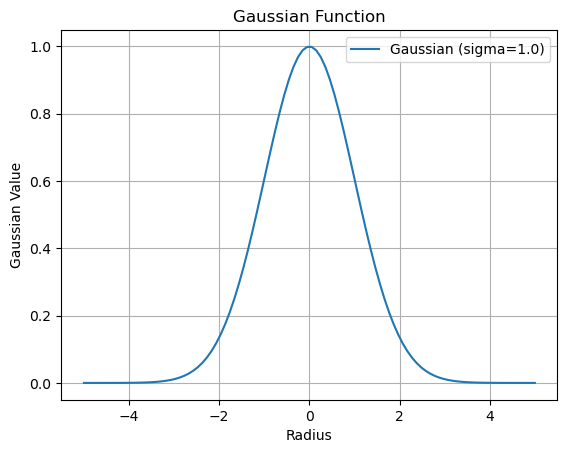

In [71]:
radius_values = np.linspace(-5, 5, 100)
sigma_value = 1.0

# Obliczanie wartości funkcji Gaussian dla każdego promienia
gaussian_values = calculate_gaussian(radius_values, sigma_value)

# Tworzenie wykresu
plt.plot(radius_values, gaussian_values, label=f'Gaussian (sigma={sigma_value})')
plt.title('Gaussian Function')
plt.xlabel('Radius')
plt.ylabel('Gaussian Value')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

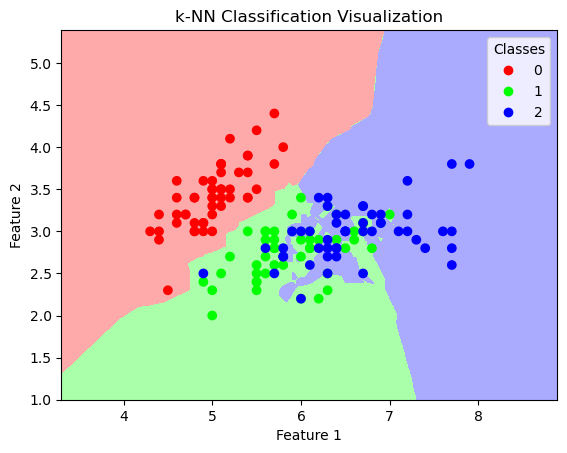

In [74]:
from matplotlib.colors import ListedColormap

# Tworzenie siatki punktów do wizualizacji
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Klasyfikacja dla każdego punktu na siatce
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wykres konturowy
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Wykres punktowy dla danych treningowych
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN Classification Visualization')

# Dodanie legendy
plt.legend(*scatter.legend_elements(), title='Classes')

# Pokazanie wykresu
plt.show()